<a href="https://colab.research.google.com/github/SejalJadhav1/python_/blob/main/BusinessAnalytics_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_excel("data_1.xlsx")
df.head()

,obs
0,5
1,4
2,4
3,5
4,5


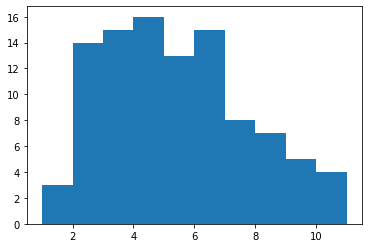

In [ ]:
import matplotlib.pyplot as plt
plt.hist(df.obs)
plt.show() # Seems like a non-gaussian distn beacuse it has two peaks

In [ ]:
df.describe()

,obs
count,100.000000
mean,4.940000
std,2.381834
min,1.000000
25%,3.000000
50%,5.000000
75%,6.000000
max,11.000000


In [ ]:
print("mean", df.obs.mean())
print("var", df.obs.var())

mean 4.94
var 5.673131313131313


In [ ]:
# mean and var seem to be very close to each other whoich represnts poisson distn
# but we need to investigate further 

In [ ]:
print("skew", df.obs.skew())
print("kurtosis", df.obs.kurt())

skew 0.5073438418753581
kurtosis -0.3795764613835608


In [ ]:
#0.5 skewness tells us that the data is nearly symmetrical 
# -0.3 kurtosis is an indication of platykirtic- central peak is lower and broader

In [ ]:
df.median()


obs    5.0
dtype: float64

In [ ]:
df.mode()

,obs
0,4


In [ ]:
import statsmodels.api as sm
import scipy.stats as stats

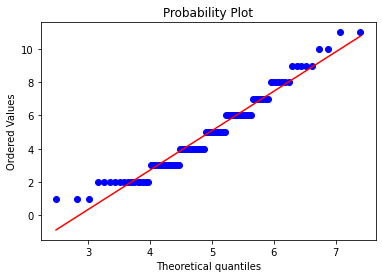

In [ ]:
stats.probplot(df.obs , plot  = plt) # by default theoretical distn is SND
plt.show()

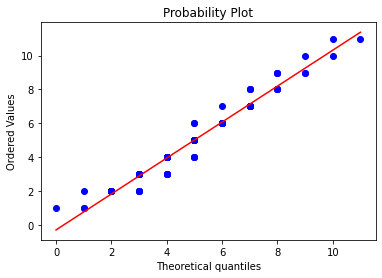

In [ ]:
stats.probplot(df.obs, dist = "poisson" , sparams = (4.940000,) , plot  = plt) 
plt.show()

In [ ]:
grouped_df = pd.DataFrame()
grouped_df["frequency"] = df.groupby("obs")["obs"].count()
grouped_df

,frequency
obs,
1,3
2,14
3,15
4,16
5,13
6,15
7,8
8,7
9,5


In [ ]:
for i in df.groupby("obs"):
  print(i)

(1,     obs
17    1
56    1
94    1)
(2,     obs
10    2
19    2
29    2
35    2
40    2
47    2
55    2
63    2
64    2
65    2
73    2
79    2
89    2
98    2)
(3,     obs
5     3
22    3
24    3
25    3
28    3
31    3
34    3
46    3
48    3
53    3
60    3
74    3
78    3
81    3
99    3)
(4,     obs
1     4
2     4
7     4
14    4
21    4
41    4
49    4
52    4
57    4
59    4
61    4
72    4
75    4
77    4
87    4
93    4)
(5,     obs
0     5
3     5
4     5
6     5
11    5
12    5
26    5
30    5
36    5
50    5
51    5
58    5
82    5)
(6,     obs
8     6
13    6
15    6
16    6
38    6
39    6
67    6
69    6
71    6
80    6
84    6
85    6
91    6
95    6
97    6)
(7,     obs
9     7
18    7
37    7
43    7
66    7
68    7
70    7
76    7)
(8,     obs
23    8
27    8
32    8
45    8
54    8
62    8
96    8)
(9,     obs
42    9
83    9
86    9
88    9
92    9)
(10,     obs
33   10
90   10)
(11,     obs
20   11
44   11)


In [ ]:
grouped_df["observed probab"] = grouped_df.frequency/len(df)
grouped_df.head()

,frequency,observed probab
obs,,
1,3,0.03
2,14,0.14
3,15,0.15
4,16,0.16
5,13,0.13


In [ ]:
from scipy import stats
from scipy.stats import poisson , chisquare

In [ ]:
poisson.pmf

<bound method rv_discrete.pmf of <scipy.stats._discrete_distns.poisson_gen object at 0x7f8ae68ec450>>

In [ ]:
grouped_df.index

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype='int64', name='obs')

In [ ]:
grouped_df["poisson_pmf"] = poisson.pmf(k = grouped_df.index
                                        , mu = df.obs.mean())
grouped_df

,frequency,observed probab,poisson_pmf
obs,,,
1,3,0.03,0.035344
2,14,0.14,0.087299
3,15,0.15,0.143752
4,16,0.16,0.177534
5,13,0.13,0.175404
6,15,0.15,0.144416
7,8,0.08,0.101916
8,7,0.07,0.062933
9,5,0.05,0.034543


In [ ]:
# probablity = freq of xi / total count
# frquency of xi = probablity * total count

In [ ]:
 sum(grouped_df.frequency)

100

In [ ]:
grouped_df["poisson_freq"] = np.round(grouped_df.poisson_pmf * sum(grouped_df.frequency) , decimals = 2)

In [ ]:
grouped_df

,frequency,observed probab,poisson_pmf,poisson freq,poisson_freq
obs,,,,,
1,3,0.03,0.035344,3.534372,3.53
2,14,0.14,0.087299,8.729898,8.73
3,15,0.15,0.143752,14.375232,14.38
4,16,0.16,0.177534,17.753411,17.75
5,13,0.13,0.175404,17.540370,17.54
6,15,0.15,0.144416,14.441572,14.44
7,8,0.08,0.101916,10.191623,10.19
8,7,0.07,0.062933,6.293327,6.29
9,5,0.05,0.034543,3.454337,3.45


In [ ]:
obs_freq = list(grouped_df.frequency )
expected_freq = list(grouped_df.poisson_freq)

In [ ]:
obs_freq

[3, 14, 15, 16, 13, 15, 8, 7, 5, 2, 2]

In [ ]:
expected_freq

[3.53, 8.73, 14.38, 17.75, 17.54, 14.44, 10.19, 6.29, 3.45, 1.71, 0.77]

In [ ]:
import scipy.stats

null hypothesis : the given data follows poisson distn

alternate hypothesis: the given data doesn't follow poisson distn

In [ ]:
scipy.stats.chisquare(obs_freq, expected_freq) # calculated  VALUE # chisquare goodness of fit test
# Power_divergenceResult(statistic=7.918170026370538, pvalue=0.636829805444405)

In [ ]:
scipy.stats.chi2.ppf(0.95, df=9)  # Tabulated value
# degrees of freedom = k - p - 1.  k = 11, p = 1 (for Poisson)
# p is the no. of parameters of the distn , here , for poisson we have only mean 
# therefore p = 1

16.918977604620448

In [ ]:
#tabulated value > calculated value => we fail to reject null hypothesis
# pvalue = 0.6 > (1- Confidence level) = 1-0.95 = 0.05  => we fail to reject null hypothesis